<a href="https://colab.research.google.com/github/sarahdell/DSPS_SDellorco/blob/main/hw9/SDELLORCO_higgsbosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import roc_curve, auc

In [3]:
#cd drive

In [4]:
#ls

In [5]:
#cd MyDrive

In [6]:
#cd kagglehiggsboson/

In [7]:
#pwd

In [8]:
#cd ..

In [9]:
os.chdir("/content/drive/MyDrive/kagglehiggsboson")

- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS_FBianco/blob/main/CodeDemos/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data


In [10]:
#cd /content/drive/MyDrive/

In [11]:
#ls kag*

In [12]:
#!mv kaggle.json .kaggle.json #hidden file has a dot in front

In [13]:
#!chmod 600 .kaggle.json #changes permissions

In [14]:
#!ls .kag*

In [15]:
#!ls -l .kag* #shows permission

In [16]:
#pwd


In [17]:
# envs = json.load(open(".kaggle.json", "r"))
# os.environ["KAGGLE_USERNAME"]=envs['username']
# os.environ["KAGGLE_KEY"]=envs['key']

In [18]:
#!mkdir kagglehiggsboson

In [19]:
#move to that directory
#!cd /content/drive/MyDrive/kagglehiggsboson


In [20]:
#!touch /content/drive/MyDrive/kagglehiggsboson/test

In [21]:
#!cd ~

In [22]:
#!cd ..

In [23]:
#!pwd

In [24]:
#cd kagglehiggsboson/

In [25]:
#!kaggle competitions download -c higgs-boson

In [26]:
#ls

In [27]:
!unzip higgs-boson.zip

Archive:  higgs-boson.zip
replace HiggsBosonCompetition_AMSMetric_rev1.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [28]:
!unzip training.zip

Archive:  training.zip
replace training.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [29]:
higgsdata=pd.read_csv("training.csv")


- Read in the trainind data. Split the provided training data into a training and a test set.
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [30]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [31]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [32]:
# Replace -999 with NaN for easier handling of missing values
higgsdataNAN=higgsdata.replace(-999, np.nan)

In [33]:
higgsdataNAN.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,...,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226,2.233584,b
2,100002,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,...,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,...,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,6.245333,b


<Axes: >

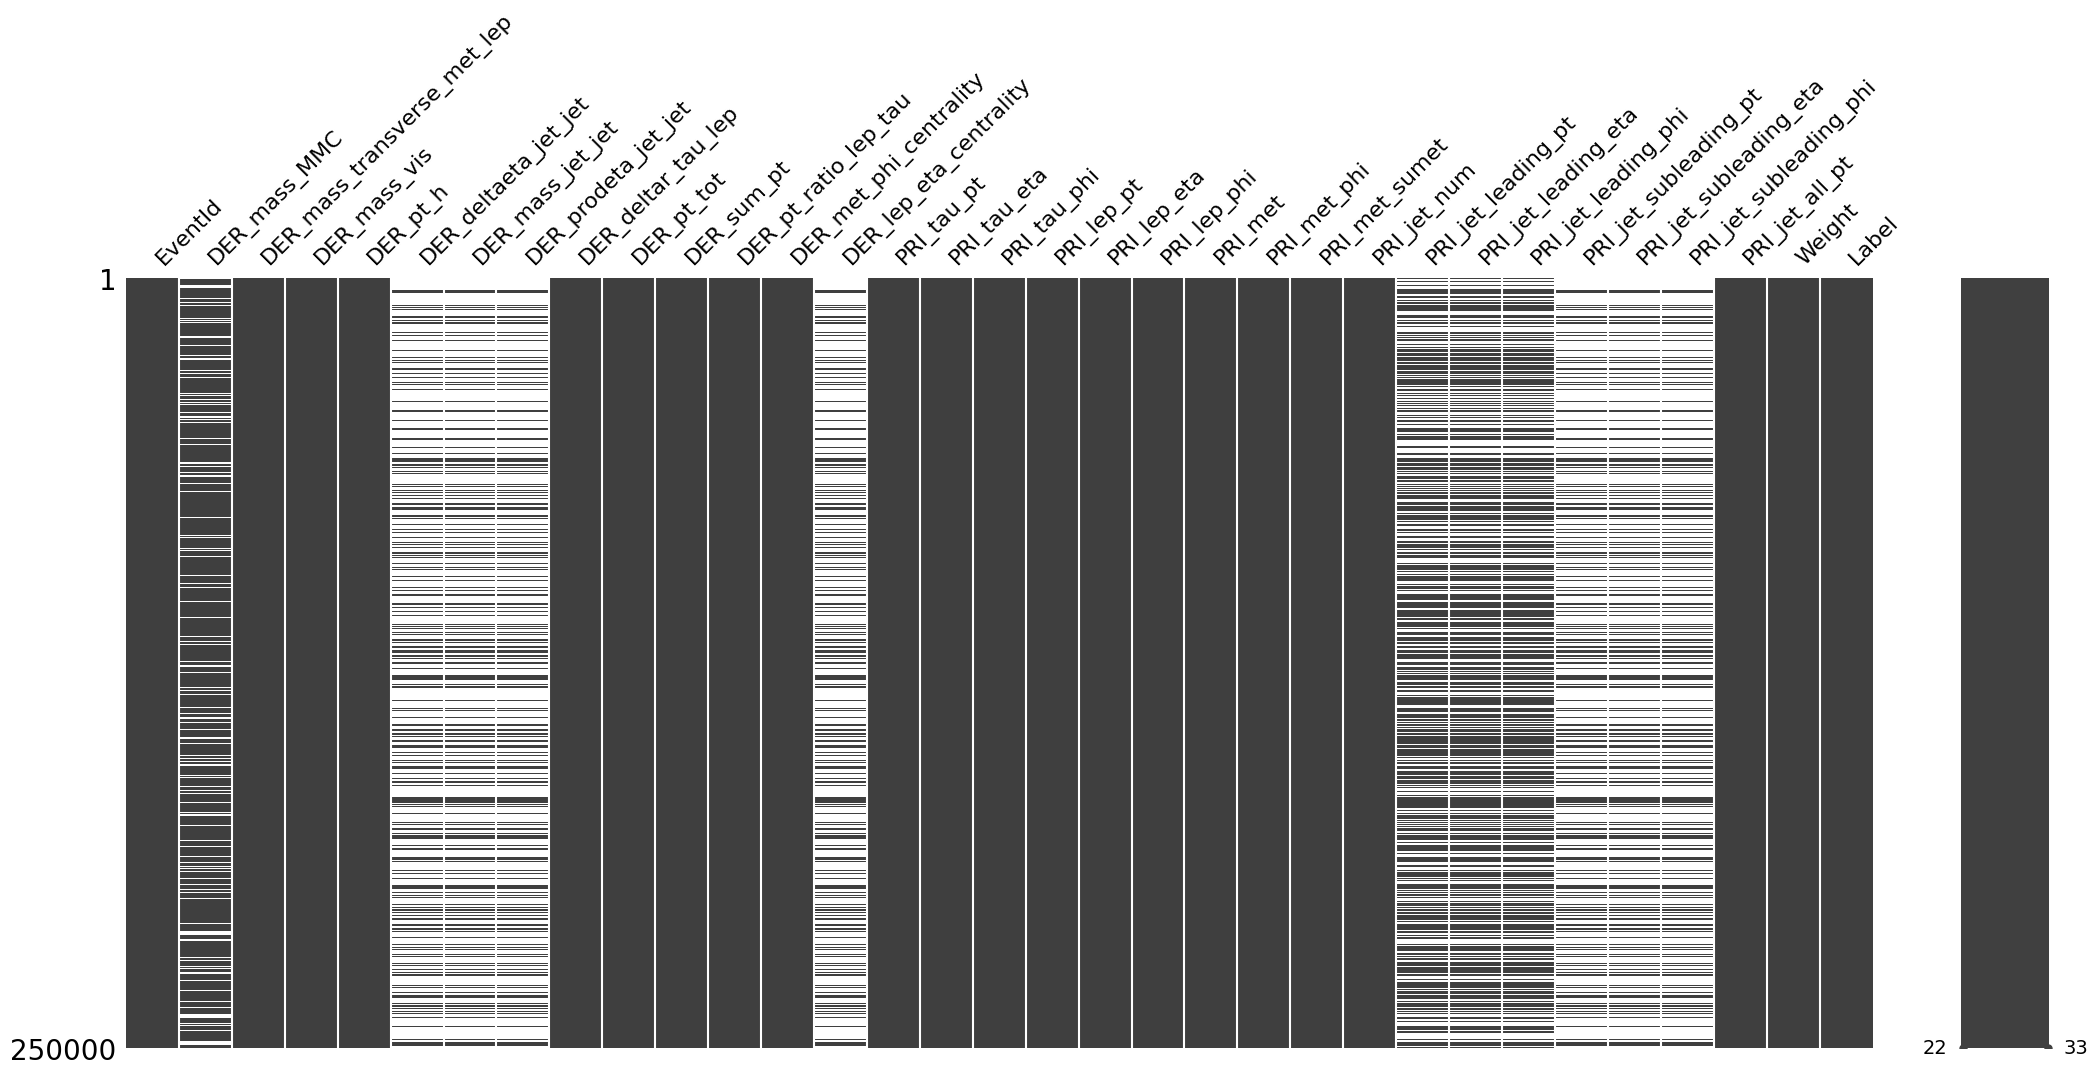

In [34]:
msno.matrix(higgsdataNAN)

**Figure 1:**

This is a matrix where each column in the dataframe is represented by a vertical bar, and missing values are given as white. You can see that there are 7 columns with a lot of missing data, 3 bars with slightly less missing data, and 1 bar with only the smallest amount of missing data. All the rest of the columns have the full amount of data.

<Axes: >

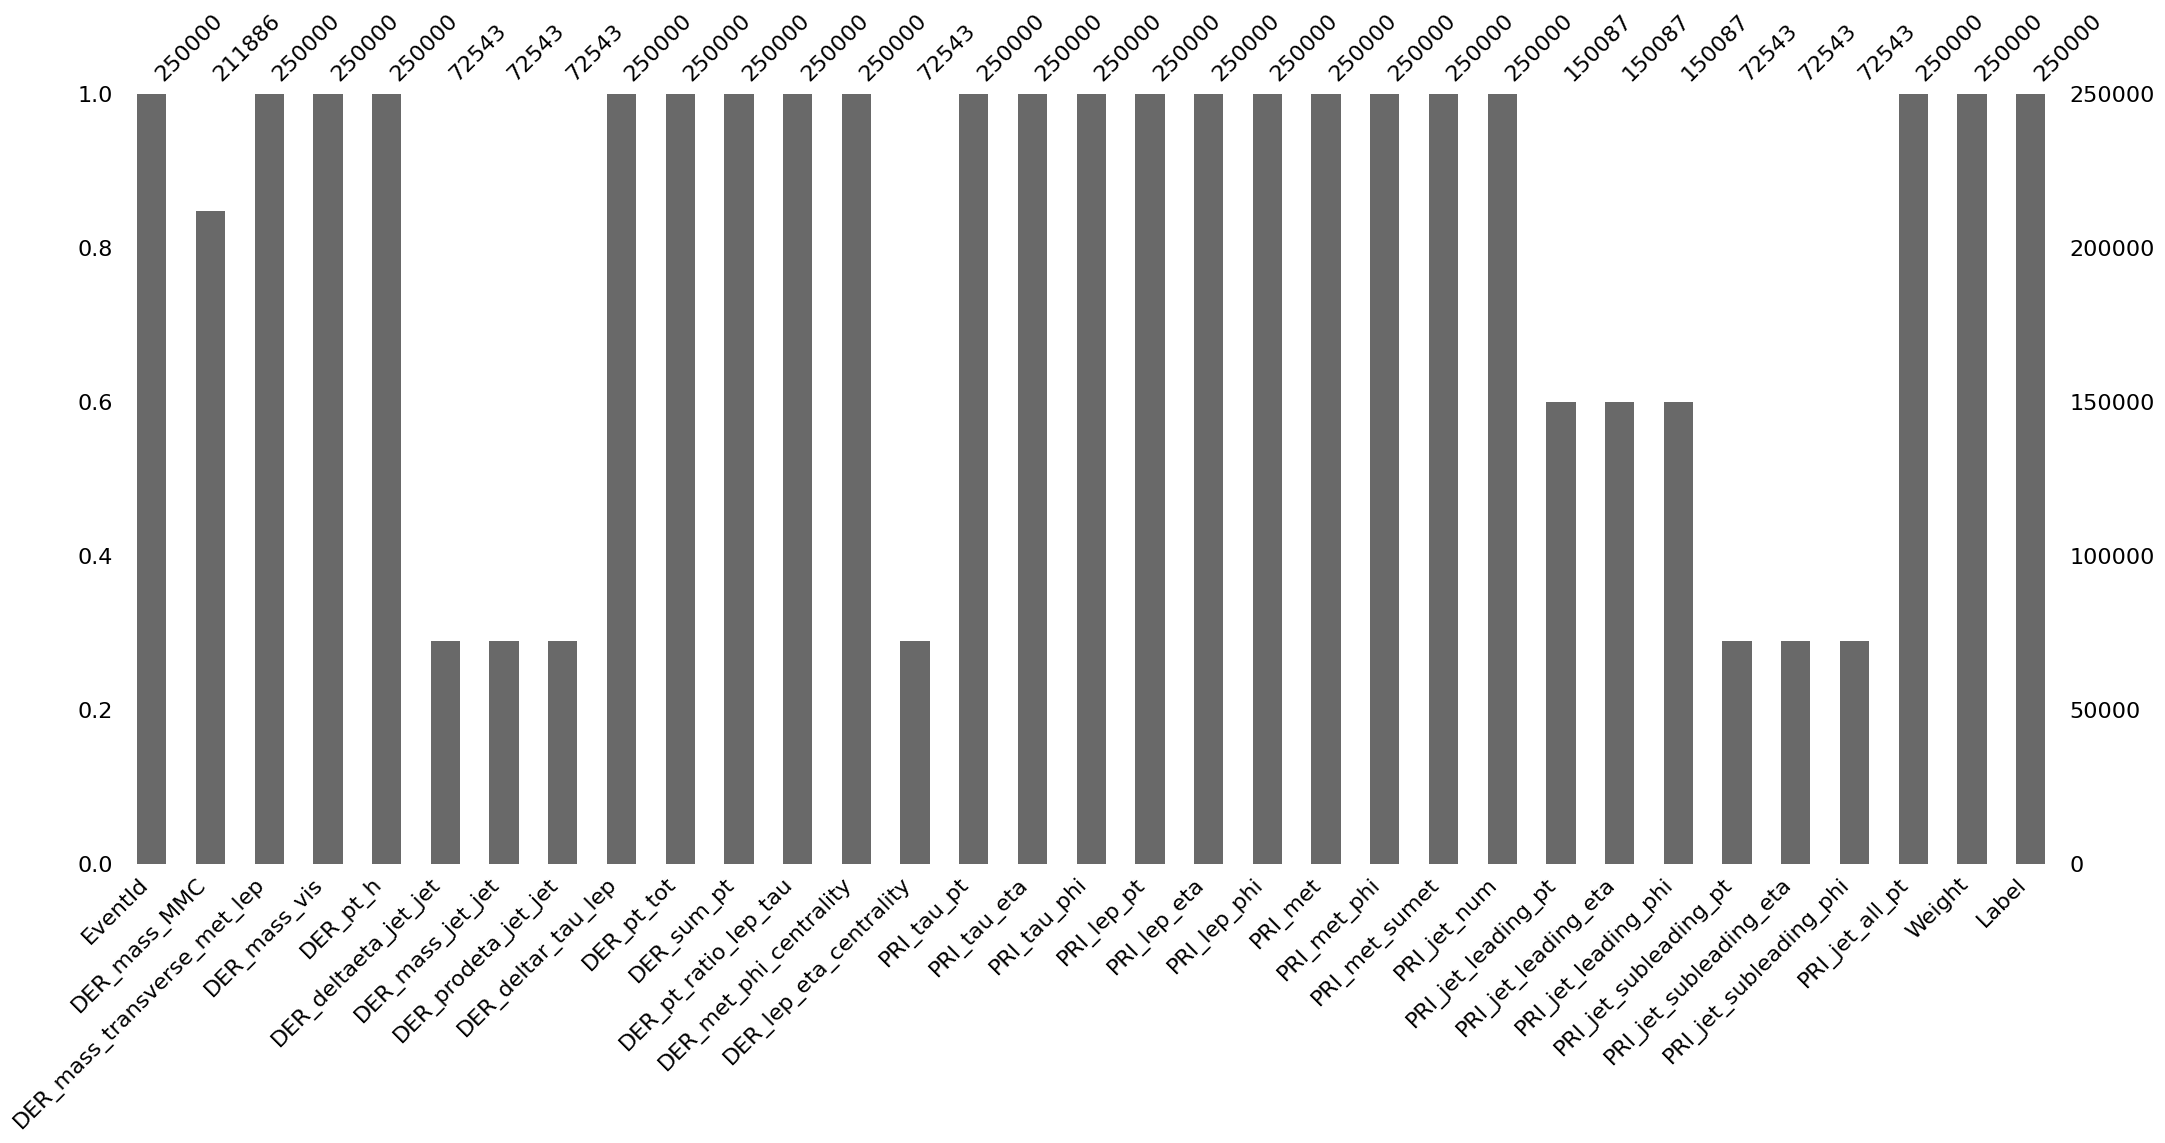

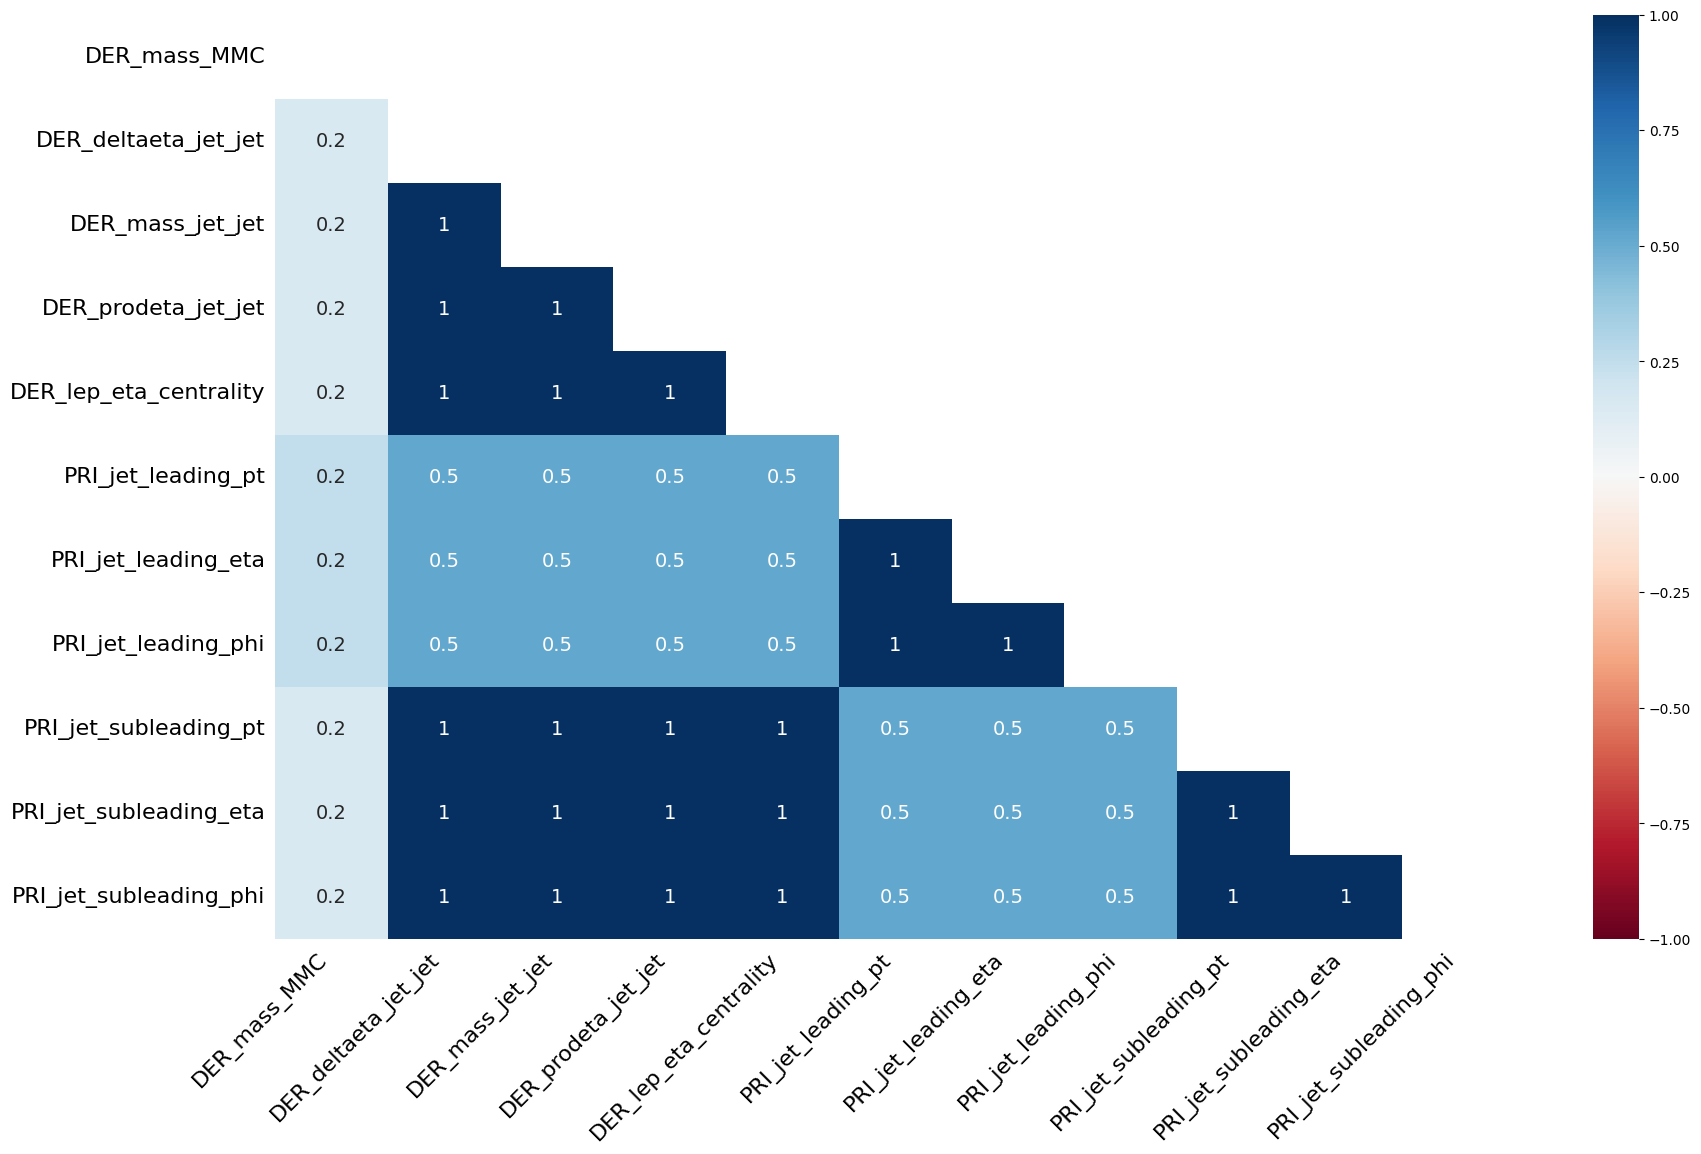

In [35]:
msno.bar(higgsdataNAN)
msno.heatmap(higgsdataNAN)

**Figure 2:**

Top: Bar graph showing how many values are present for each column in the dataset. It agrees with what was found in the matrix in Figure 1.

Bottom: Heatmap of the correlation between missing values in the columns. It shows if a value is missing in one column how likely it is to be missing in another. A score of 1 means every time the value was missing in one it was missing in the other, and 0 means there was absolutely no correlation between the two. From this we can see that for all 7 of the rows with the most missing data, the same rows have missing data. The same applies for the 3 columns with slightly less missing data.

In [36]:
higgsdata=higgsdata.drop(columns=['DER_mass_MMC','PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_leading_phi','DER_deltaeta_jet_jet','DER_mass_jet_jet','DER_prodeta_jet_jet','DER_lep_eta_centrality','PRI_jet_subleading_pt','PRI_jet_subleading_eta','PRI_jet_subleading_phi'])
higgsdata.head()

,EventId,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,...,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt,Weight,Label
0,100000,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,32.638,...,51.626,2.273,-2.414,16.824,-0.277,258.733,2,113.497,0.002653,s
1,100001,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,42.014,...,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,2.233584,b
2,100002,162.172,125.953,35.635,3.148,9.336,197.814,3.776,1.414,32.154,...,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.347389,b
3,100003,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,22.647,...,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-0.000,5.446378,b
4,100004,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,28.209,...,29.774,0.798,1.569,2.723,-0.871,53.131,0,0.000,6.245333,b


**NOTE:** The group I worked with were trying to figure out if getting rid of all columns with missing data was worth it, or if we should get rid of the 10 columns with the most missing data, and then just the rows of missing data for DER_mass_MMC, or just the 7 rows with the most missing data and the rows with missing data remaining. We were unsure which option would lose us the most significant amount of information. Eventually we decided we would divide who used the three methods and then use the results of each others' to discuss the differences. I have gotten rid of all 11 columns of missing data.

<Axes: >

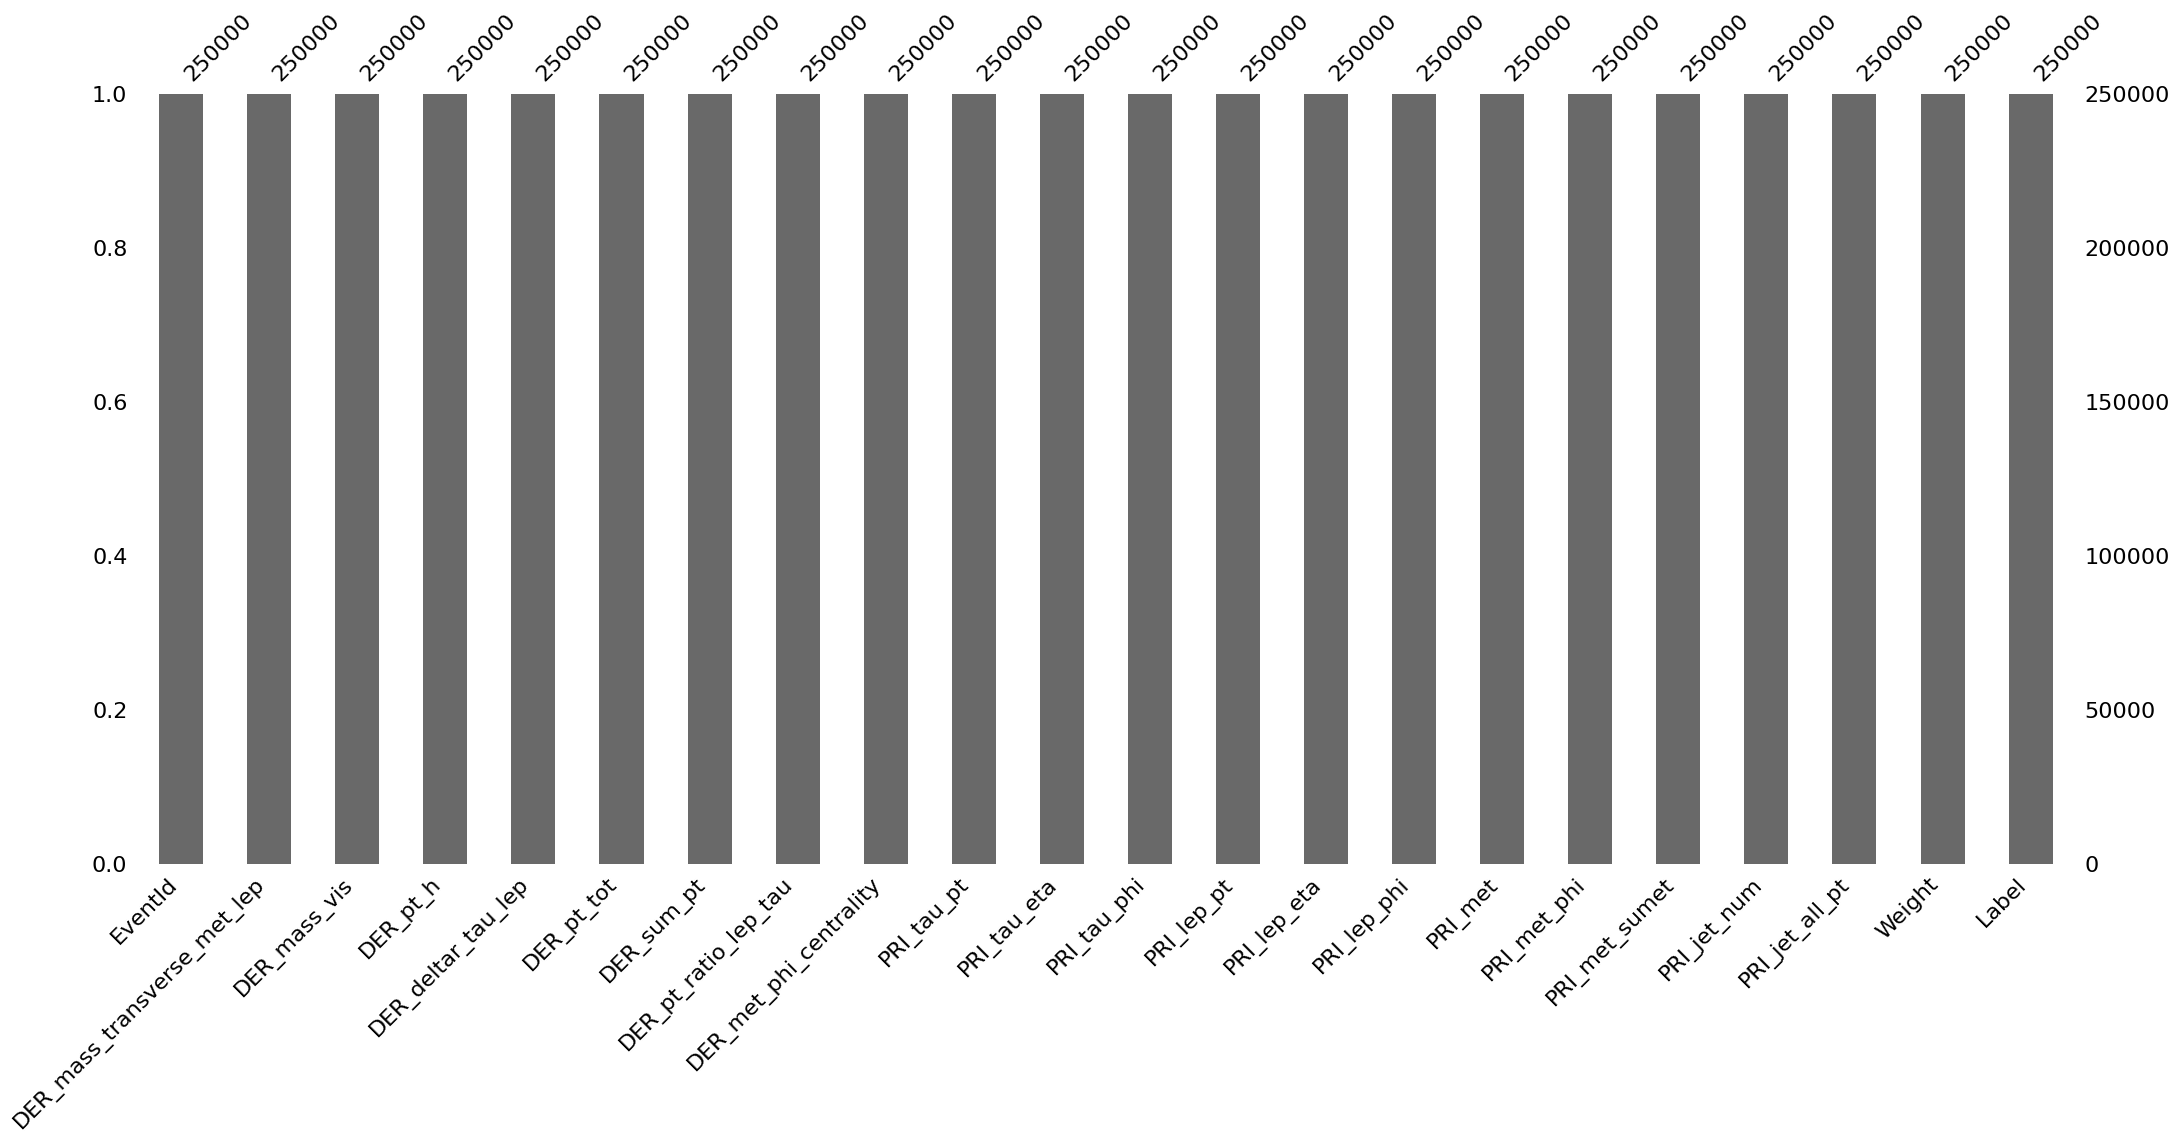

In [37]:
higgsdataNAN2=higgsdata.replace(-999, np.nan)
higgsdataNAN2
msno.bar(higgsdataNAN2)

**Figure 3:** Bar graph showing missing data after removing 11 columns from the dataset. All columns present have all the data present, no missing rows.

In [38]:
higgsdata.Label

0         s
1         b
2         b
3         b
4         b
         ..
249995    b
249996    b
249997    s
249998    b
249999    b
Name: Label, Length: 250000, dtype: object

In [39]:
higgsdata.Label.unique() #Label is binary

array(['s', 'b'], dtype=object)

In [40]:
label_counts = higgsdata['Label'].value_counts()

# Display the counts
print("Label Counts:")
print(label_counts)

Label Counts:
b    164333
s     85667
Name: Label, dtype: int64


**NOTE:** The "s" label stands for Signal, and the "b" label stands for Background. In the context of the dataset, the "s" particles are true Higgs-Boson particles, and "b" particles are not. So we make "s" the positive result and "b" the negative result because we want to predict the existence of the Higgs-Boson particle. There are more "b" particles than "s" particles.

In [41]:
higgsdata.Weight

0         0.002653
1         2.233584
2         2.347389
3         5.446378
4         6.245333
            ...   
249995    4.505083
249996    2.497259
249997    0.018636
249998    1.681611
249999    1.877474
Name: Weight, Length: 250000, dtype: float64

- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [42]:
# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 42)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [43]:
X = higgsdata.drop(['Label', 'Weight'], axis=1)
y_label = higgsdata['Label']
y_weight = higgsdata['Weight']

# Split the dataset into training and test sets
X_train, X_test, y_label_train, y_label_test, y_weight_train, y_weight_test = train_test_split(
    X, y_label, y_weight, test_size=0.3, random_state=42
)

In [44]:
# Random Forest Classifier for Label Prediction
rf_model_label = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=11)
rf_model_label.fit(X_train, y_label_train)

# Predict on the training set for label
train_predictions_rf_label = rf_model_label.predict(X_train)
train_accuracy_rf_label = accuracy_score(y_label_train, train_predictions_rf_label)

# Predict on the test set for label
test_predictions_rf_label = rf_model_label.predict(X_test)
test_accuracy_rf_label = accuracy_score(y_label_test, test_predictions_rf_label)

print("Random Forest Classifier for Label Prediction:")
print(f"Training Accuracy: {train_accuracy_rf_label:.5f}")
print(f"Test Accuracy: {test_accuracy_rf_label:.5f}")

Random Forest Classifier for Label Prediction:
Training Accuracy: 0.84351
Test Accuracy: 0.82173


In [45]:
# Gradient Boosted Tree Classifier for Label Prediction
gb_model_label = GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=7)
gb_model_label.fit(X_train, y_label_train)

# Predict on the training set for label
train_predictions_gb_label = gb_model_label.predict(X_train)
train_accuracy_gb_label = accuracy_score(y_label_train, train_predictions_gb_label)

# Predict on the test set for label
test_predictions_gb_label = gb_model_label.predict(X_test)
test_accuracy_gb_label = accuracy_score(y_label_test, test_predictions_gb_label)

print("\nGradient Boosted Tree Classifier for Label Prediction:")
print(f"Training Accuracy: {train_accuracy_gb_label:.4f}")
print(f"Test Accuracy: {test_accuracy_gb_label:.4f}")



Gradient Boosted Tree Classifier for Label Prediction:
Training Accuracy: 0.8496
Test Accuracy: 0.8296


**NOTE:** The main parameter affecting the accuracy of the forest model classifiers in predicting Labels was the max_depth, which decides how many layers the tree will have. After running this with many different max_depths, I settled at 11 for Random Forest and 7 for Gradient Boosted because it maximized the training accuracy without having signs of overfitting. We know the model is overfitted if the training accuracy value is significantly higher than the test accuracy value. Since the training accuracy and the test accuracy are only about 0.02 apart, we can say that the model has a generally consistent accurate prediction rate for Labels with the dataset. Both the Random Forest and the Gradient Boosted Tree models had about the same accuracy. While having about an 83% accuracy is not amazing, it is not horrible either.

calculate the  scores for the training and test sets and evaluate  overtraining etc

- Produce a confusion matrix for each model and compare them






In [46]:

# I creaded this function (mostly copied from sklearn examples).
# You can use it to create the confusion matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='',
                          cmap=plt.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(cm, cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    plt.xticks([0, 1], labels=["N", "P"])
    plt.ylim(-0.5,1.5)
    plt.yticks([0,1], labels=["N", "P"])
    plt.title(title)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = plt.colorbar(im, cax=cax)


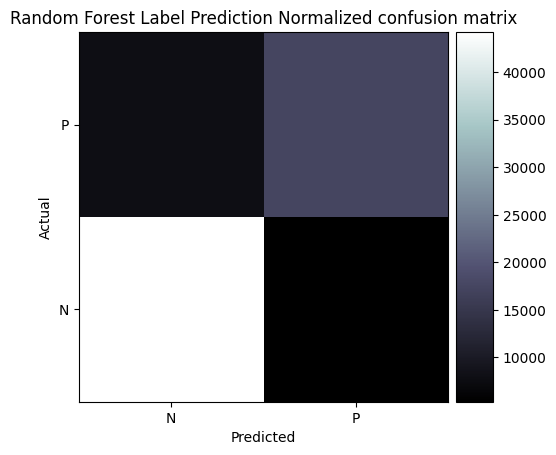

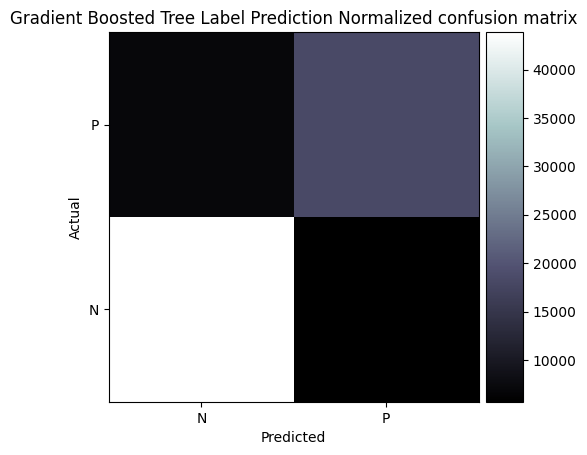

In [47]:
# Predictions for Random Forest model
y_pred_rf_label = rf_model_label.predict(X_test)

# Plot confusion matrix for Random Forest model
plot_confusion_matrix(y_label_test, y_pred_rf_label, normalize=True, title='Random Forest Label Prediction')

# Predictions for Gradient Boosted Tree model
y_pred_gb_label = gb_model_label.predict(X_test)

# Plot confusion matrix for Gradient Boosted Tree model
plot_confusion_matrix(y_label_test, y_pred_gb_label, normalize=True, title='Gradient Boosted Tree Label Prediction')

plt.show()


**Figure 4:**

Confusion Matrices for the Random Forest Model (top) and Gradient Boosted Tree Model (Bottom) for predicting Labels in the Higgs-Boson dataset. The column Label is a binary variable; it can only contain "s" or "b." On the axes, N represents a negative result, in our case, the "b" label, and P represents a positive result, in our case, the "s" label. The square for PP represents the times the positive predicted result matched the actual result, NN represents the times the negative predicted result matched the actual result, NP represents the times the "b" label was predicted but was false and the actual value was "s". PN is the reverse of NP; it is the times the "s" label was predicted but the actual value was "b". The values of each result are shown below. It seems as though the negatives were predicted accurately most of the time, and there is a higher count of accurate predictions for that case, which makes sense since there are more rows with Label "b" than there are with Label "s." Both methods (RF and GBT) had about the same accuracy, although it appears the RF model was slightly better at guessing correctly with the Negative "b" result, and the GBT model was slightly better at guessing correctly with the Positive "s" result.

In [48]:
# Assuming y_label_test and y_pred_rf_label are your actual and predicted labels for RF
cm_rf = confusion_matrix(y_label_test, y_pred_rf_label)

# Extract values
TN_rf = cm_rf[0, 0]  # True Negative RF
FP_rf = cm_rf[0, 1]  # False Positive RF
FN_rf = cm_rf[1, 0]  # False Negative RF
TP_rf = cm_rf[1, 1]  # True Positive RF

# Display the counts for RF
print("RF True Negative (NN):", TN_rf)
print("RF False Positive (PN):", FP_rf)
print("RF False Negative (NP):", FN_rf)
print("RF True Positive (PP):", TP_rf)

RF True Negative (NN): 44223
RF False Positive (PN): 5332
RF False Negative (NP): 8038
RF True Positive (PP): 17407


In [49]:
# Assuming y_label_test and y_pred_gb_label are your actual and predicted labels for GBT
cm_gb = confusion_matrix(y_label_test, y_pred_gb_label)

# Extract values
TN_gb = cm_gb[0, 0]  # True Negative GBT
FP_gb = cm_gb[0, 1]  # False Positive GBT
FN_gb = cm_gb[1, 0]  # False Negative GBT
TP_gb = cm_gb[1, 1]  # True Positive GBT

# Display the counts for GBT
print("GBT True Negative (NN):", TN_gb)
print("GBT False Positive (PN):", FP_gb)
print("GBT False Negative (NP):", FN_gb)
print("GBT True Positive (PP):", TP_gb)

GBT True Negative (NN): 43882
GBT False Positive (PN): 5673
GBT False Negative (NP): 7105
GBT True Positive (PP): 18340


#required for 661, EC for 461
- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [50]:
# Random Forest Regressor for Weight Prediction
rf_model_weight = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=3)
rf_model_weight.fit(X_train, y_weight_train)

# Predict on the training set for weight
train_predictions_rf_weight = rf_model_weight.predict(X_train)
train_mse_rf_weight = mean_squared_error(y_weight_train, train_predictions_rf_weight)

# Predict on the test set for weight
test_predictions_rf_weight = rf_model_weight.predict(X_test)
test_mse_rf_weight = mean_squared_error(y_weight_test, test_predictions_rf_weight)

print("\nRandom Forest Regressor for Weight Prediction:")
print(f"Training MSE: {train_mse_rf_weight:.4f}")
print(f"Test MSE: {test_mse_rf_weight:.4f}")



Random Forest Regressor for Weight Prediction:
Training MSE: 1.8358
Test MSE: 1.8233


In [51]:
# Gradient Boosted Tree Regressor for Weight Prediction
gb_model_weight = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model_weight.fit(X_train, y_weight_train)

# Predict on the training set for weight
train_predictions_gb_weight = gb_model_weight.predict(X_train)
train_mse_gb_weight = mean_squared_error(y_weight_train, train_predictions_gb_weight)

# Predict on the test set for weight
test_predictions_gb_weight = gb_model_weight.predict(X_test)
test_mse_gb_weight = mean_squared_error(y_weight_test, test_predictions_gb_weight)

print("\nGradient Boosted Tree Regressor for Weight Prediction:")
print(f"Training MSE: {train_mse_gb_weight:.4f}")
print(f"Test MSE: {test_mse_gb_weight:.4f}")


Gradient Boosted Tree Regressor for Weight Prediction:
Training MSE: 1.3707
Test MSE: 1.3794


**NOTE:** For the random forest model for Weight, the Mean Squared Error for the test and training sets were very close, about 0.01 apart, showing that there was no overfitting of the data. The values are about 1.83, meaning that the square of the difference between the true and predicted values of Weight were about 1.83 off on average. For gradient boosted for Weight, the MSE was about 1.37, and actually the data seemed to fit slightly better for the test set than the training set, which is interesting. But both values are less than 0.01 off, so it is nothing to be concerned about. The model fit both the test and the training set with pretty much equal accuracy.

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [52]:
# Predictions for Random Forest Regressor
y_pred_rf_weight = rf_model_weight.predict(X_test)

# Calculate L2 (Mean Squared Error) loss
l2_loss_rf = mean_squared_error(y_weight_test, y_pred_rf_weight)

# Calculate L1 (Mean Absolute Error) loss
l1_loss_rf = mean_absolute_error(y_weight_test, y_pred_rf_weight)

print("Random Forest Regressor Losses:")
print(f"L2 Loss: {l2_loss_rf:.4f}")
print(f"L1 Loss: {l1_loss_rf:.4f}")

# Predictions for Gradient Boosted Tree Regressor
y_pred_gb_weight = gb_model_weight.predict(X_test)

# Calculate L2 (Mean Squared Error) loss
l2_loss_gb = mean_squared_error(y_weight_test, y_pred_gb_weight)

# Calculate L1 (Mean Absolute Error) loss
l1_loss_gb = mean_absolute_error(y_weight_test, y_pred_gb_weight)

print("\nGradient Boosted Tree Regressor Losses:")
print(f"L2 Loss: {l2_loss_gb:.4f}")
print(f"L1 Loss: {l1_loss_gb:.4f}")


Random Forest Regressor Losses:
L2 Loss: 1.8233
L1 Loss: 1.0020

Gradient Boosted Tree Regressor Losses:
L2 Loss: 1.3794
L1 Loss: 0.8562


**NOTE:** The L2 method seemed to have more loss than L1 method for both Tree models. It suggests a relatively weaker emphasis on sparsity and feature selection compared to the smoothing effect on the coefficients. Typically, L1 loss is preferred when feature selection is desired, and you want a sparse model. It is used when there is a belief that only a subset of features is relevant. L2 is used when you want to include all features but prevent them from having too much influence, and there is concern about multicollinearity.

# Choose between feature importance and grid optimization (both 461 and 661)

- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)







- Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

In [53]:
# Get feature importances
feature_importances = rf_model_label.feature_importances_

# Find the indices of the top 4 most important features
top_feature_indices = feature_importances.argsort()[-4:][::-1] #sorts from lowest to highest, so takes last 4 with [-4:] and flips to have the highest first with [::-1]

# Get the names of the features from the original dataset
top_features = X_train.columns[top_feature_indices]

# Print the results
print("Top 4 Most Important Features:")
for feature in top_features:
    print(feature)

# Print the corresponding importances
print("\nCorresponding Importances:")
for index in top_feature_indices:
    print(f"{X_train.columns[index]}: {feature_importances[index]}")


Top 4 Most Important Features:
DER_mass_transverse_met_lep
DER_mass_vis
DER_met_phi_centrality
PRI_tau_pt

Corresponding Importances:
DER_mass_transverse_met_lep: 0.21489530601645343
DER_mass_vis: 0.19359259149727795
DER_met_phi_centrality: 0.09580166274361193
PRI_tau_pt: 0.08653911233847439


In [54]:
random_grid = {
    'n_estimators': [10, 100, 1000],
    'max_depth': [3, 10, None],
    'max_features': ['auto', 'sqrt']
}

print(random_grid)


{'n_estimators': [10, 100, 1000], 'max_depth': [3, 10, None], 'max_features': ['auto', 'sqrt']}


 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [55]:
higgsdata.iloc[:, top_feature_indices]

,DER_mass_transverse_met_lep,DER_mass_vis,DER_met_phi_centrality,PRI_tau_pt
0,51.655,97.827,1.396,32.638
1,68.768,103.235,1.414,42.014
2,162.172,125.953,1.414,32.154
3,81.417,80.943,-1.285,22.647
4,16.915,134.805,-1.385,28.209
...,...,...,...,...
249995,71.989,36.548,-1.414,24.754
249996,58.179,68.083,-1.345,23.416
249997,60.526,75.839,0.529,35.636
249998,19.362,68.812,1.414,27.944


In [56]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation,
# search across 18 different combinations
random_search = RandomizedSearchCV(estimator = rf_model_label, param_distributions=random_grid,
                                   n_iter=1, cv=3)


Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [57]:
random_search.fit(X_train, y_label_train)


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=11,
                                                    random_state=42),
                   n_iter=1,
                   param_distributions={'max_depth': [3, 10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 100, 1000]})

In [58]:
# Print the tuned parameters and best score
print("Tuned RF Parameters:")
print(random_search.best_params_)
print("Best score is {:.4f}".format(random_search.best_score_))

Tuned RF Parameters:
{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 10}
Best score is 0.8174


In [59]:
df = pd.DataFrame(random_search.cv_results_)


In [60]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,50.562637,1.149439,0.92679,0.012839,100,sqrt,10,"{'n_estimators': 100, 'max_features': 'sqrt', ...",0.819831,0.815696,0.81669,0.817406,0.001762,1


Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it.

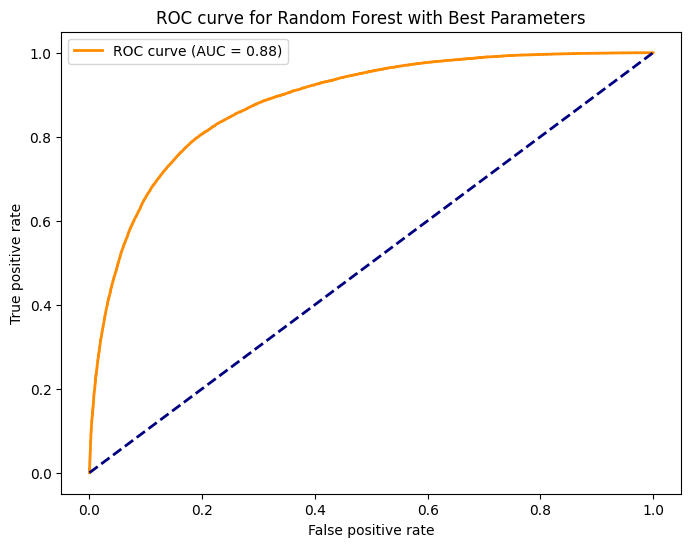

In [61]:
# Use the best parameters from the random search
best_params = random_search.best_params_

# Create the RandomForestClassifier with the best parameters
rf_model_label_best = RandomForestClassifier(**best_params)
rf_model_label_best.fit(X_train, y_label_train.values.flatten()=="s")

# The random forest model by itself
y_pred_grd_rfcat_best = rf_model_label_best.predict_proba(X_test)[:, 1]

fpr_rf_best, tpr_rf_best, _ = roc_curve(y_label_test.values.flatten()=="s", y_pred_grd_rfcat_best)
roc_auc_rf_best = auc(fpr_rf_best, tpr_rf_best)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_best, tpr_rf_best, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf_best:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Random Forest with Best Parameters')
plt.legend(loc='best')
plt.show()


**Figure 5:**

ROC using the best parameters for the random forest model. The Area Under Curve (AUC) value is 0.88, meaning it is a pretty good model. More often than not the model predicted the correct label for rows with "s" labels than it did predicting "s" when the label was actually "b." An AUC of 1 is the best value possible and 0.5 is random guessing. The dotted line is a ROC curve with a 0.5 AUC value.